# Redes de Hopfield

Tras haber visto la teoría básica de las Redes Neuronales Recurrentes de Hopfield, vamos a ver un ejemplo que lo deje más claro.

<small>Fuente: [Hopfield Networks is all you Need](https://ml-jku.github.io/hopfield-layers/)</small>

Primero cargamos el conjunto de datos MNIST estándar y creamos un lote grande (no haremos ningún entrenamiento, esto es sólo para poder probar un gran número de patrones almacenados).

Posteriormente crearemos una función llamada `load_mnist` que será la encargada de generar los 

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)


Las redes de Hopfield clásicas sólo funcionan con valores binarios, por lo que definimos funciones de utilidad para binarizar una imagen. 

A continuación, queremos probar la capacidad de recuperación de la red cuando se enmascara la mitad de una imagen almacenada. Un detalle crucial es que las imágenes *deben* binarizarse a [-1,1] y *no* a [0,1]. 

¡¡¡La binarización [0,1] hará que todo falle!!!

In [ ]:
def binarize(img):
  i = img.astype(np.float32)
  i[img > 0] = -1
  i[img <=0] = 1
  return i

def zero_bottom_half(img):
  i = img.astype(np.float32)
  H,W = img.shape
  i[H//2:H,:] = -1
  return i

Veamos si funcionan correctamente:

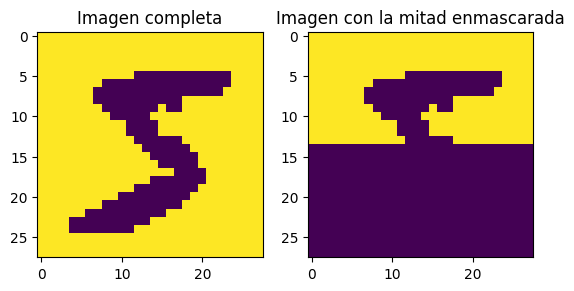

In [ ]:
img = x_train[0]
digit = binarize(img)
halved_digit = zero_bottom_half(digit)

plt.subplot(1,2,1)
plt.title("Imagen completa")
plt.imshow(digit)

plt.subplot(1,2,2)
plt.title("Imagen con la mitad enmascarada")
plt.imshow(halved_digit)
plt.show()

Por último, llegamos a la red de Hopfield clásica, que puede recuperar un patrón de su lista de patrones almacenados a partir de una pista parcial (una imagen medio enmascarada). 

Dado un vector $\mathbf{X}$ de patrones almacenados, la red Hopfield los almacena en una matriz de pesos $\mathbf{W} = \mathbf{X}\mathbf{X}^T$.

Para recuperar un elemento con una "*sonda*" $z$ (imagen enmascarada), aplicamos la regla de actualización de Hopfield $z^{t+1} = \mathit{sign}(\mathbf{W}z - b)$, donde $b$ es un vector de sesgos que aquí ignoramos (ponemos a 0).

Se puede demostrar directamente que esta regla de actualización es el gradiente de la función de energía de Hopfield $\mathbf{E} = -\frac{1}{2}z^T \mathbf{w}z + z^Tb$.

A continuación demostramos que la recuperación funciona perfectamente cuando sólo se almacena un único patrón.

In [ ]:
digit.shape

(28, 28)

Es necesario que la reformateemos a vector:

In [ ]:
digit = digit.reshape((28*28, 1))
digit.shape

(784, 1)

In [ ]:
# Guardamos un único patrón en la matriz de pesos
# es lo mismo que W = np.matmul(digit, digit.T)
W = digit @ digit.T

Los pesos de la red son:

In [ ]:
W.shape

In [ ]:
W

In [ ]:
plt.imshow(W)

Ahora podemos emplear la "sonda" (imagen enmascarada) para recuperar la imagen original:

In [ ]:
halved_digit = halved_digit.reshape((28*28, 1))
halved_digit.shape

In [ ]:
# Empleamos la "sonda" (imagen enmascarada) para recuperar la imagen original
out = binarize(W @ halved_digit)

In [ ]:

# Y visualizamos
plt.subplot(1,3,1)
plt.title("Dígito enmascarado")
plt.imshow(halved_digit.reshape(28,28))
plt.subplot(1,3,2)
plt.title("Salida de la red")
plt.imshow(out.reshape(28,28))
plt.show()
plt.subplot(1,3,3)
plt.title("Dígito real")
plt.imshow(digit.reshape(28,28))
plt.show()

Y si enmascaramos otra región?

In [ ]:
def zero_middle_half(img):
    i = img.astype(np.float32)
    H,W = img.shape
    i[H//3:-H//3,:] = -1
    return i

img = x_train[0]
digit = binarize(img)
halved_digit_middle = zero_middle_half(digit)

plt.subplot(1,2,1)
plt.title("Imagen completa")
plt.imshow(digit)

plt.subplot(1,2,2)
plt.title("Imagen con la mitad enmascarada")
plt.imshow(halved_digit_middle)
plt.show()

halved_digit_middle = halved_digit_middle.reshape((28*28, 1))

# Empleamos la "sonda" (imagen enmascarada) para recuperar la imagen original
out = binarize(W @ halved_digit_middle)

# Y visualizamos
plt.subplot(1,3,1)
plt.title("Dígito enmascarado")
plt.imshow(halved_digit_middle.reshape(28,28))
plt.subplot(1,3,2)
plt.title("Salida de la red")
plt.imshow(out.reshape(28,28))
plt.show()
plt.subplot(1,3,3)
plt.title("Dígito real")
plt.imshow(digit.reshape(28,28))
plt.show()

¿Y si lo que no tenemos es el comienzo?

In [ ]:
def zero_top_half(img):
    i = img.astype(np.float32)
    H,W = img.shape
    i[:H//2,:] = -1
    return i

img = x_train[0]
digit = binarize(img)
halved_digit_top = zero_top_half(digit)

plt.subplot(1,2,1)
plt.title("Imagen completa")
plt.imshow(digit)

plt.subplot(1,2,2)
plt.title("Imagen con la mitad enmascarada")
plt.imshow(halved_digit_top)
plt.show()

halved_digit_top = halved_digit_top.reshape((28*28, 1))

# Empleamos la "sonda" (imagen enmascarada) para recuperar la imagen original
out = binarize(W @ halved_digit_top)

# Y visualizamos
plt.subplot(1,3,1)
plt.title("Dígito enmascarado")
plt.imshow(halved_digit_top.reshape(28,28))
plt.subplot(1,3,2)
plt.title("Salida de la red")
plt.imshow(out.reshape(28,28))
plt.show()
plt.subplot(1,3,3)
plt.title("Dígito real")
plt.imshow(digit.reshape(28,28))
plt.show()

**¡Maravilloso!**

Probemos ahora la capacidad de recuperación de la red cuando se almacenan varios dígitos. 

Cuando se almacenan 3 dígitos, vemos que la recuperación es perfecta. 

Nota: Las reconstrucciones suelen estar invertidas, pero es el comportamiento esperado, ya que no tenemos sesgos y la función de energía es simétrica.

In [ ]:
def store_retrieve_N_images(imgs, N):
  
  # construimos la matriz de pesos para almacenar N imágenes
  W = np.zeros((784,784))
  for i in range(N):
    digit = binarize(imgs[i,:].reshape(784,1))
    W += digit @ digit.T

  # tras haber guardado N imágenes, tratamos de recuperarlas
  for i in range(N):
    digit = binarize(imgs[i,:]).reshape(28,28)
    halved_digit = zero_bottom_half(digit).reshape(784,1)
    out = binarize(W @ halved_digit)
    plt.subplot(1,2,1)
    plt.title("Imagen original")
    plt.imshow(digit)
    plt.subplot(1,2,2)
    plt.title("Imagen reconstruida")
    plt.imshow(out.reshape(28,28))
    plt.show()

store_retrieve_N_images(x_train, 3)

Sin embargo, podemos comprobar que conforme aumentamos el número de imágenes a guardar ("patrones" que la red reconoce), la reconstrucción comienza a fallar:

In [ ]:
store_retrieve_N_images(x_train, 5)

In [ ]:
store_retrieve_N_images(x_train, 10)

Realmente, este problema no se debe a la capacidad de almacenamiento de la red, que es muy superior a 10, sino a que las entradas están correlacionadas.

Para paliar este problema, podemos utilizar la extensión de la red de Hopfield que introdujeron Krotov y Hopfield (2016) y Demircigil (2017), que permite una memoria asociativa densa. 

<small>Explicación matemática:</small>

<small>Estas redes tienen la función de energía $\mathbf{E} = -exp(\beta^{-1} log (\sum_i exp(\beta x_i^T z))$. Demircigil demostró que esta función de energía puede optimizarse con una regla de aprendizaje:
$z^{t+1}[l] = -\mathit{sign}(\mathbf{E}[z[l]^+] + \mathbf{E}[z[l]^-])$</small>

<small>Donde $z[l]^+$ es z donde z[l] = +1. En efecto, esta regla de actualización enumera explícitamente todos los posibles cambios en la sonda z, y determina si éstos aumentan o disminuyen la energía. Si disminuyen la energía, se mantienen en la salida. Esta regla es, en efecto, una búsqueda combinatoria de todos los cambios posibles en z para encontrar el que más minimiza la energía. </small>

Es importante destacar que en esta red los patrones almacenados ya no se guardan en una única matriz de pesos. En su lugar, cada patrón se compara en serie con la sonda y, a continuación, se suman todos los patrones.

In [ ]:
def demircigil_update_rule(z, xs):
  out = np.zeros((len(z),1))
  # iteramos sobre cada elemento de z
  for i in range(len(z)):
    # inicializamos los acumuladores E_pos y E_neg
    E_pos = 0
    E_neg = 0
    # hacemos copias para no transformar el array original
    z_pos = z.copy()
    z_neg = z.copy()
    # usamos tanto z[l]+ and z[l]-
    z_pos[i] = 1
    z_neg[i] = -1
    # para cada patrón almacenado en xs
    for x in xs:
      # calculamos las energías positivas y negativas
      E_plus = x.T @ z_pos
      E_minus = x.T @ z_neg
      # y acumulamos sus valores tras aplicarles la exponencial, como en la fórmula
      E_pos += np.exp(E_plus/10)
      E_neg += np.exp(E_minus/10)
    # si la energía positiva es mayor que la negativa, hacemos un "flip" del valor
    if E_pos > E_neg:
      out[i] = 1
    else:
      out[i] = -1
  return out

Probemos si esta regla de actualización funciona con unos pocos patrones almacenados, superando así a la red Hopfield clásica en capacidad de almacenamiento de memoria.

In [ ]:
# almacenamos 5 patrones en la memoria de la red
N = 5
xs = [binarize(x_train[i].reshape(784,1)) for i in range(N)]
np.array(xs).shape

In [ ]:
# mostramos el dígito enmascarado
plt.imshow(halved_digit.reshape(28, 28))

In [ ]:
# se lo pasamos a la red, que en esta ocasion tiene N patrones en memoria almacenados
out = demircigil_update_rule(halved_digit, xs)

In [ ]:
# la salida es del tamaño correcto
out.shape

In [ ]:
# visualizamos la salida
plt.imshow(out.reshape(28, 28))

Vamos a crear una función ahora que nos permita visualizar N patrones:

In [ ]:
def retrieve_store_demircigil(imgs, N, break_val=-1):

  xs = [binarize(imgs[i,:].reshape(784,1)) for i in range(N)]
  
  for j in range(N):
    # para evitar mostrar muchas imágenes para patrones almacenados que sean grandes
    if break_val >0:
      if j > break_val:
        break
    
    # enmascaramos la imagen
    halved_digit = zero_bottom_half(xs[j]).reshape(784,1)
    
    # la reconstruimos usando la regla de Demircigil
    out = demircigil_update_rule(halved_digit, xs)
    
    # mostramos los resultados
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
    
    imgs = [xs[j], halved_digit, out]
    titles = ["Original", "Masked", "Reconstruction"]
    for i, ax in enumerate(axs.flatten()):
      plt.sca(ax)
      plt.imshow(imgs[i].reshape(28,28))
      plt.title(titles[i])
    plt.show()

In [ ]:
retrieve_store_demircigil(x_train, 10)

Aunque funciona, esta regla de actualización no es buena por varias razones. 

- En primer lugar, porque estamos comparando explícitamente permutaciones de z, es difícil de vectorizar, y por lo tanto es lento. 
- En segundo lugar, una implementación *naive* es numéricamente inestable debido a la exponenciación de las energías. Esto a menudo resulta en *nans* o infinitos. 

De hecho, si os fijáis, para conseguir que funcione tuve dividimos las energías calculadas por una constante arbitraria de 10. Sin embargo, probablemente hay mejores formas de hacerlo.

Probemos si esta regla de actualización funciona con unos pocos patrones almacenados, superando así a la red Hopfield clásica en capacidad de almacenamiento de memoria.

Esta red puede almacenar 10 patrones sin degradación en la terminación de patrones, a diferencia de las redes Hopfield clásicas. 

Sin embargo, la recuperación perfecta sigue estando limitada a un nivel muy inferior a su capacidad teórica debido a la correlación de los patrones. 

Por ejemplo, hay algunas recuperaciones incorrectas con 100 patrones.

In [ ]:
retrieve_store_demircigil(x_train, 100, 5)

Esto es solo un aperitivo de lo que se puede hacer con redes de Hopfield. De hecho, desde 2021 y la aparición del paper "[Hopfield Networks is all you need](https://https://ml-jku.github.io/hopfield-layers/)", estas redes son mucho más capaces.

Por ejemplo, aquí tenéis algunas aplicaciones de las redes de Hopfield en el mundo real:

1. **Recuperación de patrones**: son especialmente útiles para almacenar y recuperar patrones. Pueden utilizarse para reconocer y recordar imágenes, letras, números u otros tipos de datos. Por ejemplo, se han utilizado para reconocimiento de caracteres en OCR (Optical Character Recognition) y para el reconocimiento de rostros en sistemas de seguridad.

2. **Optimización combinatoria**: pueden utilizarse para resolver problemas de optimización combinatoria, donde se busca encontrar la mejor solución entre muchas posibles combinaciones. Por ejemplo, se han aplicado en la planificación de rutas, asignación de recursos, diseño de circuitos y programación de horarios.

3. **Reconocimiento de patrones y clasificación**: pueden utilizarse para clasificar y reconocer patrones en conjuntos de datos. Por ejemplo, en el campo de la bioinformática, se han utilizado para clasificar secuencias de ADN y proteínas.

4. **Memoria asociativa**: pueden funcionar como sistemas de memoria asociativa, donde se puede recuperar información a partir de una clave o fragmento de información relacionado. Esto ha encontrado aplicaciones en sistemas de recomendación, recuperación de información y filtrado colaborativo.

5. Modelado y simulación: pueden utilizarse para modelar y simular sistemas complejos. Se han utilizado en campos como la física, la biología, la economía y la psicología para estudiar y comprender fenómenos complejos.

Estas son solo algunas aplicaciones de las redes de Hopfield en el mundo real. Su capacidad para almacenar y recuperar información, así como su robustez ante ruido y daños parciales, las hace útiles en una variedad de áreas.